## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [13]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [14]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [15]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [17]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
"""
設定要訓練的 Epoch 數
跑4小時
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 271us/step - loss: 2.2624 - accuracy: 0.1599 - val_loss: 2.2106 - val_accuracy: 0.2068
Epoch 2/500
50000/50000 [==============================] - 13s 264us/step - loss: 2.1746 - accuracy: 0.2363 - val_loss: 2.1431 - val_accuracy: 0.2447
Epoch 3/500
50000/50000 [==============================] - 13s 260us/step - loss: 2.1133 - accuracy: 0.2649 - val_loss: 2.0859 - val_accuracy: 0.2772
Epoch 4/500
50000/50000 [==============================] - 13s 268us/step - loss: 2.0621 - accuracy: 0.2832 - val_loss: 2.0407 - val_accuracy: 0.2898
Epoch 5/500
50000/50000 [==============================] - 13s 261us/step - loss: 2.0215 - accuracy: 0.2973 - val_loss: 2.0046 - val_accuracy: 0.3011
Epoch 6/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.9890 - accuracy: 0.3072 - val_loss: 1.9770 - val_accuracy: 0.3090
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.6506 - accuracy: 0.4253 - val_loss: 1.6581 - val_accuracy: 0.4212
Epoch 56/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.6474 - accuracy: 0.4269 - val_loss: 1.6588 - val_accuracy: 0.4190
Epoch 57/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.6440 - accuracy: 0.4273 - val_loss: 1.6534 - val_accuracy: 0.4223
Epoch 58/500
50000/50000 [==============================] - 21s 414us/step - loss: 1.6409 - accuracy: 0.4284 - val_loss: 1.6509 - val_accuracy: 0.4242
Epoch 59/500
50000/50000 [==============================] - 22s 438us/step - loss: 1.6378 - accuracy: 0.4302 - val_loss: 1.6461 - val_accuracy: 0.4251
Epoch 60/500
50000/50000 [==============================] - 22s 442us/step - loss: 1.6345 - accuracy: 0.4293 - val_loss: 1.6434 - val_accuracy: 0.4285
Epoch 61/500
50000/50000 [==============================] - 22s 443us/step - loss: 1.6314 - ac

50000/50000 [==============================] - 30s 594us/step - loss: 1.5146 - accuracy: 0.4729 - val_loss: 1.5398 - val_accuracy: 0.4586
Epoch 110/500
50000/50000 [==============================] - 28s 557us/step - loss: 1.5128 - accuracy: 0.4734 - val_loss: 1.5383 - val_accuracy: 0.4609
Epoch 111/500
50000/50000 [==============================] - 30s 594us/step - loss: 1.5111 - accuracy: 0.4735 - val_loss: 1.5420 - val_accuracy: 0.4558
Epoch 112/500
50000/50000 [==============================] - 29s 577us/step - loss: 1.5087 - accuracy: 0.4751 - val_loss: 1.5385 - val_accuracy: 0.4577
Epoch 113/500
50000/50000 [==============================] - 30s 594us/step - loss: 1.5072 - accuracy: 0.4752 - val_loss: 1.5354 - val_accuracy: 0.46205065 - ac
Epoch 114/500
50000/50000 [==============================] - 29s 581us/step - loss: 1.5053 - accuracy: 0.4769 - val_loss: 1.5325 - val_accuracy: 0.4631
Epoch 115/500
50000/50000 [==============================] - 27s 538us/step - loss: 1.5027 - 

50000/50000 [==============================] - 26s 522us/step - loss: 1.4216 - accuracy: 0.5059 - val_loss: 1.4716 - val_accuracy: 0.4789
Epoch 163/500
50000/50000 [==============================] - 27s 533us/step - loss: 1.4199 - accuracy: 0.5059 - val_loss: 1.4708 - val_accuracy: 0.4743
Epoch 164/500
50000/50000 [==============================] - 26s 526us/step - loss: 1.4183 - accuracy: 0.5071 - val_loss: 1.4699 - val_accuracy: 0.4774
Epoch 165/500
50000/50000 [==============================] - 26s 519us/step - loss: 1.4168 - accuracy: 0.5062 - val_loss: 1.4730 - val_accuracy: 0.4789
Epoch 166/500
50000/50000 [==============================] - 27s 544us/step - loss: 1.4153 - accuracy: 0.5073 - val_loss: 1.4695 - val_accuracy: 0.4788
Epoch 167/500
50000/50000 [==============================] - 26s 525us/step - loss: 1.4140 - accuracy: 0.5072 - val_loss: 1.4653 - val_accuracy: 0.4781
Epoch 168/500
50000/50000 [==============================] - 29s 581us/step - loss: 1.4125 - accuracy:

Epoch 216/500
50000/50000 [==============================] - 26s 510us/step - loss: 1.3424 - accuracy: 0.5318 - val_loss: 1.4217 - val_accuracy: 0.4957
Epoch 217/500
50000/50000 [==============================] - 24s 475us/step - loss: 1.3410 - accuracy: 0.5316 - val_loss: 1.4235 - val_accuracy: 0.4970
Epoch 218/500
50000/50000 [==============================] - 23s 470us/step - loss: 1.3398 - accuracy: 0.5330 - val_loss: 1.4229 - val_accuracy: 0.4913
Epoch 219/500
50000/50000 [==============================] - 24s 476us/step - loss: 1.3379 - accuracy: 0.5342 - val_loss: 1.4196 - val_accuracy: 0.4962
Epoch 220/500
50000/50000 [==============================] - 26s 520us/step - loss: 1.3366 - accuracy: 0.5352 - val_loss: 1.4337 - val_accuracy: 0.4869
Epoch 221/500
50000/50000 [==============================] - 25s 495us/step - loss: 1.3359 - accuracy: 0.5344 - val_loss: 1.4167 - val_accuracy: 0.4952
Epoch 222/500
50000/50000 [==============================] - 26s 513us/step - loss: 1.33

Epoch 270/500
50000/50000 [==============================] - 25s 491us/step - loss: 1.2712 - accuracy: 0.5562 - val_loss: 1.3941 - val_accuracy: 0.5026
Epoch 271/500
50000/50000 [==============================] - 25s 498us/step - loss: 1.2703 - accuracy: 0.5574 - val_loss: 1.3862 - val_accuracy: 0.5066
Epoch 272/500
50000/50000 [==============================] - 25s 494us/step - loss: 1.2689 - accuracy: 0.5566 - val_loss: 1.4068 - val_accuracy: 0.5021
Epoch 273/500
50000/50000 [==============================] - 26s 517us/step - loss: 1.2681 - accuracy: 0.5575 - val_loss: 1.3841 - val_accuracy: 0.5114
Epoch 274/500
50000/50000 [==============================] - 25s 502us/step - loss: 1.2667 - accuracy: 0.5574 - val_loss: 1.3975 - val_accuracy: 0.5025
Epoch 275/500
50000/50000 [==============================] - 25s 503us/step - loss: 1.2658 - accuracy: 0.5592 - val_loss: 1.3835 - val_accuracy: 0.5078
Epoch 276/500
50000/50000 [==============================] - 26s 513us/step - loss: 1.26

50000/50000 [==============================] - 17s 333us/step - loss: 1.2079 - accuracy: 0.5788 - val_loss: 1.3806 - val_accuracy: 0.5070
Epoch 324/500
50000/50000 [==============================] - 17s 337us/step - loss: 1.2067 - accuracy: 0.5785 - val_loss: 1.3770 - val_accuracy: 0.5107
Epoch 325/500
50000/50000 [==============================] - 17s 336us/step - loss: 1.2056 - accuracy: 0.5787 - val_loss: 1.3662 - val_accuracy: 0.5132
Epoch 326/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.2040 - accuracy: 0.5807 - val_loss: 1.3616 - val_accuracy: 0.5164
Epoch 327/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.2025 - accuracy: 0.5801 - val_loss: 1.3660 - val_accuracy: 0.5115
Epoch 328/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.2014 - accuracy: 0.5806 - val_loss: 1.3644 - val_accuracy: 0.5132
Epoch 329/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.2001 - accuracy:

50000/50000 [==============================] - 16s 323us/step - loss: 1.1462 - accuracy: 0.6010 - val_loss: 1.3729 - val_accuracy: 0.5070
Epoch 378/500
50000/50000 [==============================] - 16s 314us/step - loss: 1.1454 - accuracy: 0.6008 - val_loss: 1.3674 - val_accuracy: 0.5145
Epoch 379/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.1434 - accuracy: 0.6013 - val_loss: 1.3618 - val_accuracy: 0.5158
Epoch 380/500
50000/50000 [==============================] - 16s 311us/step - loss: 1.1427 - accuracy: 0.6018 - val_loss: 1.3376 - val_accuracy: 0.5240
Epoch 381/500
50000/50000 [==============================] - 16s 326us/step - loss: 1.1414 - accuracy: 0.6018 - val_loss: 1.3914 - val_accuracy: 0.5080
Epoch 382/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.1411 - accuracy: 0.6014 - val_loss: 1.3393 - val_accuracy: 0.5242
Epoch 383/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.1397 - accuracy:

Epoch 431/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.0857 - accuracy: 0.6229 - val_loss: 1.3410 - val_accuracy: 0.5211
Epoch 432/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.0852 - accuracy: 0.6217 - val_loss: 1.3560 - val_accuracy: 0.5236
Epoch 433/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.0839 - accuracy: 0.6232 - val_loss: 1.3527 - val_accuracy: 0.5184
Epoch 434/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.0843 - accuracy: 0.6227 - val_loss: 1.3401 - val_accuracy: 0.5241
Epoch 435/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.0813 - accuracy: 0.6238 - val_loss: 1.3676 - val_accuracy: 0.5140
Epoch 436/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.0828 - accuracy: 0.6233 - val_loss: 1.3350 - val_accuracy: 0.5279
Epoch 437/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.07

Epoch 485/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.0308 - accuracy: 0.6430 - val_loss: 1.3269 - val_accuracy: 0.5329
Epoch 486/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.0294 - accuracy: 0.6419 - val_loss: 1.3359 - val_accuracy: 0.5257
Epoch 487/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.0293 - accuracy: 0.6424 - val_loss: 1.3539 - val_accuracy: 0.5267
Epoch 488/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.0318 - accuracy: 0.6417 - val_loss: 1.3814 - val_accuracy: 0.5180
Epoch 489/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.0275 - accuracy: 0.6444 - val_loss: 1.3659 - val_accuracy: 0.5169
Epoch 490/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.0252 - accuracy: 0.6435 - val_loss: 1.3812 - val_accuracy: 0.5198
Epoch 491/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.02

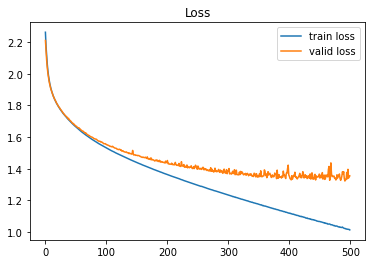

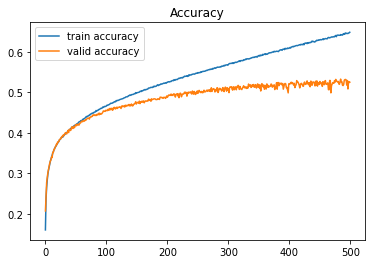

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()